In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Read the data in pandas
#inp0= pd.read_csv("application_data.csv")
inp0= pd.read_csv("application_data.csv")
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
inp0.shape

(307511, 122)

In [6]:
inp1= pd.read_csv("previous_application.csv")

In [7]:
inp0.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Missing values cleanup - A threshold value of 40% is considered. ie all columns with null values more than 40% are removed.

In [9]:
inp0 = inp0.loc[:, inp0.isnull().mean() < .4]
inp0.size
inp0.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [10]:
# 16 columns are present with null values status after the cleanup
nullvars = inp0.isnull().sum()
nullvars.index
nullvars.values

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
          12,   278,  1292,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
       96391,     2,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,   660, 60965,  1021,  1021,  1021,
        1021,     1,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0, 41519, 41519, 41519, 41519, 41519,
       41519], dtype=int64)

In [11]:
inp0.columns
# 72 columns remaining after the cleanup of missing value columns, ie we will be using 72 variables (columns) for our 
# further analysis

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [12]:
# CNT_CHILDREN has many values, we can categorize into fixed categories, NONE for 0, ONE for 1, TWO for 2, OTHERS for rest.
# We will add a column PARENT_CAT with these values and drop CNT_CHILDREN.
def func(x):
    if x == 0:
        return "NONE"
    elif x == 1:
        return "ONE"
    elif x == 2:
        return "TWO"
    else: 
        return "OTHERS"
inp0["PARENT_CAT"] = inp0.CNT_CHILDREN.apply(func)
inp0.PARENT_CAT.unique()


array(['NONE', 'ONE', 'TWO', 'OTHERS'], dtype=object)

In [13]:
#we can drop CNT_CHILDREN column
inp0.drop("CNT_CHILDREN", axis=1, inplace=True)

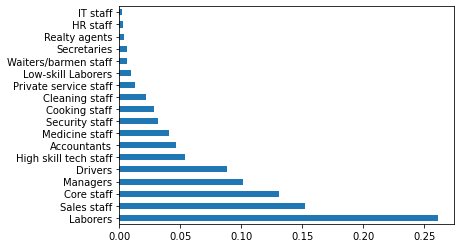

In [14]:
# handling missing values in OCCUPATION_TYPE
inp0.OCCUPATION_TYPE.describe()
inp0.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

In [15]:
# there are about 96391 missing values OCCUPATION_TYPE.we will replace this with 'OTHERS'
inp0.OCCUPATION_TYPE.isnull().sum()

96391

In [16]:
inp0.OCCUPATION_TYPE.fillna('OTHERS', inplace=True)

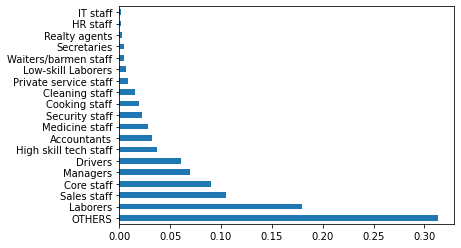

In [17]:
inp0.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
# We will take each variable and do basic analysis

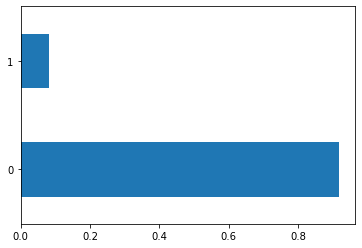

In [18]:
inp0.TARGET.describe()
# inp0.Style.value_counts(normalize=True).plot.barh()
inp0.TARGET.value_counts(normalize=True).plot.barh()
plt.show()
# From this we can say 92% data with no defaulters, 8% data is with defaulters. 
# Furter analysis will be done on Target column at later stage.

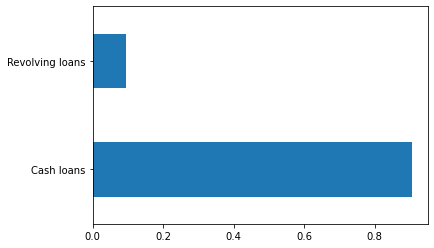

In [19]:
inp0.NAME_CONTRACT_TYPE.describe()
inp0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

In [20]:
inp0.NAME_CONTRACT_TYPE.describe()

count         307511
unique             2
top       Cash loans
freq          278232
Name: NAME_CONTRACT_TYPE, dtype: object

In [21]:
inp0.CODE_GENDER.describe()

count     307511
unique         3
top            F
freq      202448
Name: CODE_GENDER, dtype: object

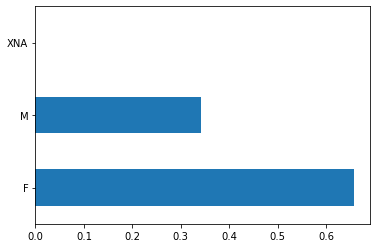

In [21]:
inp0.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()
#df['column_name']. value_counts(normalize=True) 
# 65% data on female , 34% data on male category

In [22]:
inp0.FLAG_OWN_CAR.describe()

count     307511
unique         2
top            N
freq      202924
Name: FLAG_OWN_CAR, dtype: object

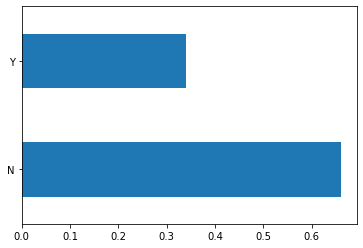

In [23]:
inp0.FLAG_OWN_CAR.value_counts(normalize=True).plot.barh()
plt.show()
# 65% data with no own car, 34% with own car

In [24]:
inp0.FLAG_OWN_REALTY.describe()

count     307511
unique         2
top            Y
freq      213312
Name: FLAG_OWN_REALTY, dtype: object

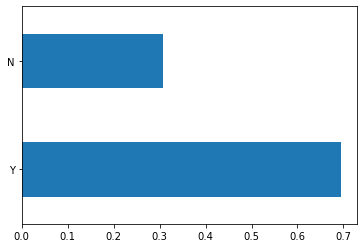

In [25]:
inp0.FLAG_OWN_REALTY.value_counts(normalize=True).plot.barh()
plt.show()
# 65% data with own property, 30% with no own property

In [26]:
pd.options.display.float_format = '{:,.2f}'.format
inp0.AMT_INCOME_TOTAL.describe() #value_counts(normalize=True) 

count       307,511.00
mean        168,797.92
std         237,123.15
min          25,650.00
25%         112,500.00
50%         147,150.00
75%         202,500.00
max     117,000,000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [27]:
#inp0[inp0.AMT_ANNUITY >= 70006.5]
#Cleanup AMT_INCOME_TOTAL data using IQR Formula
#202500 + 1.5*(202500-112500) = 337500
inp0.drop(inp0[inp0['AMT_INCOME_TOTAL'] >= 337500.0].index, inplace = True)

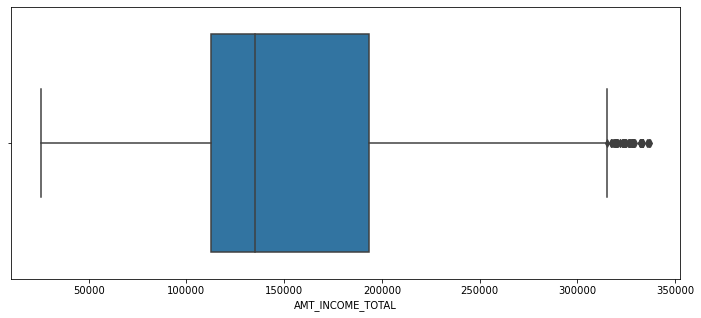

In [28]:
#Create a box plot for AMT_INCOME_TOTAL column after cleanup.
plt.figure(figsize=[12,5])
sns.boxplot(data = inp0, x='AMT_INCOME_TOTAL')
plt.show()

In [29]:
inp0.AMT_ANNUITY.describe() #value_counts(normalize=True)

count   291,674.00
mean     26,172.51
std      13,353.33
min       1,615.50
25%      16,200.00
50%      24,331.50
75%      33,246.00
max     225,000.00
Name: AMT_ANNUITY, dtype: float64

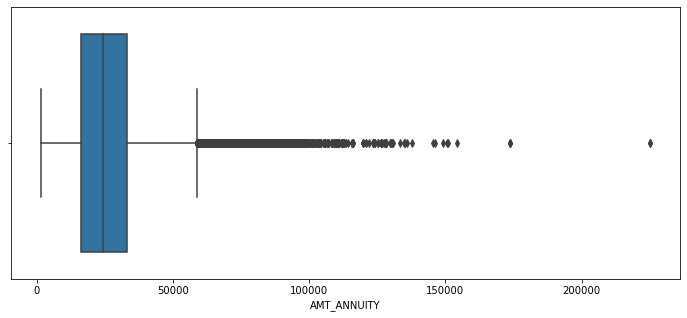

In [30]:
inp0.AMT_ANNUITY.describe() #value_counts(normalize=True)  

#Create a box plot for AMT_ANNUITY column
plt.figure(figsize=[12,5])
sns.boxplot(data = inp0, x='AMT_ANNUITY')
plt.show()


In [31]:
# Detection of outliers using IQR Formula
# Q3 + 1.5 IQR ie 
34596 + 1.5 * (33246-16200)#  = 60165.0


# # Outliers can be dropped with command 
inp0.drop(inp0[inp0['AMT_ANNUITY'] >= 60165].index, inplace = True)


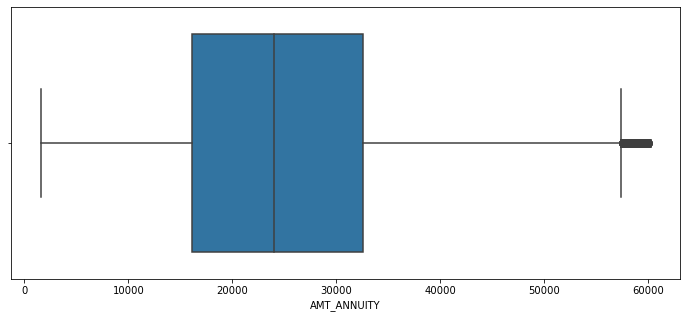

count   286,395.00
mean     25,346.64
std      11,883.84
min       1,615.50
25%      16,096.50
50%      23,989.50
75%      32,602.50
max      60,160.50
Name: AMT_ANNUITY, dtype: float64

In [32]:
#Create a box plot for the AMT_ANNUITY column after cleanup of outliers
plt.figure(figsize=[12,5])
sns.boxplot(data = inp0, x='AMT_ANNUITY')
plt.show()
inp0.AMT_ANNUITY.describe()

In [33]:
inp0.AMT_CREDIT.describe() 


count     286,407.00
mean      563,898.19
std       365,418.89
min        45,000.00
25%       270,000.00
50%       495,000.00
75%       780,363.00
max     2,340,000.00
Name: AMT_CREDIT, dtype: float64

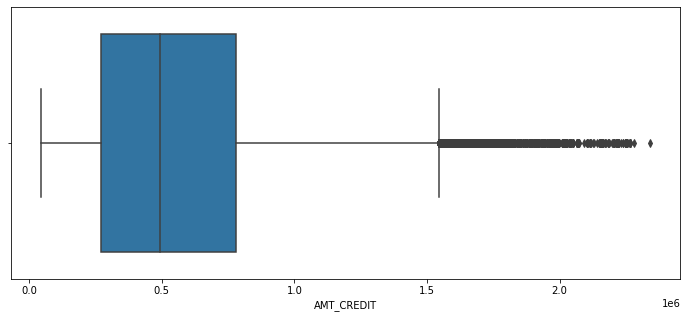

1545907.5

In [34]:
# Cleanup of outliers for AMT_CREDIT
# Box plot for AMT_CREDIT

plt.figure(figsize=[12,5])
sns.boxplot(data = inp0, x='AMT_CREDIT')
plt.show()
780363.00 + 1.5*(780363.00-270000.00)

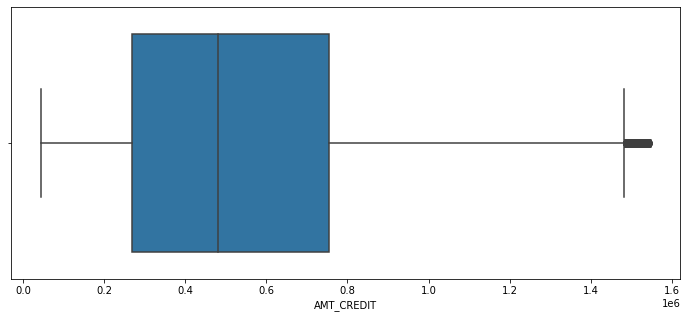

In [35]:
# Outliers cleanup for AMT_CREDIT
inp0.drop(inp0[inp0['AMT_CREDIT'] >= 1545907.0].index, inplace = True)
plt.figure(figsize=[12,5])
sns.boxplot(data = inp0, x='AMT_CREDIT')
plt.show()

In [37]:
inp0.AMT_GOODS_PRICE.describe()

count     280,957.00
mean      485,266.56
std       300,758.75
min        40,500.00
25%       225,000.00
50%       450,000.00
75%       675,000.00
max     1,543,500.00
Name: AMT_GOODS_PRICE, dtype: float64

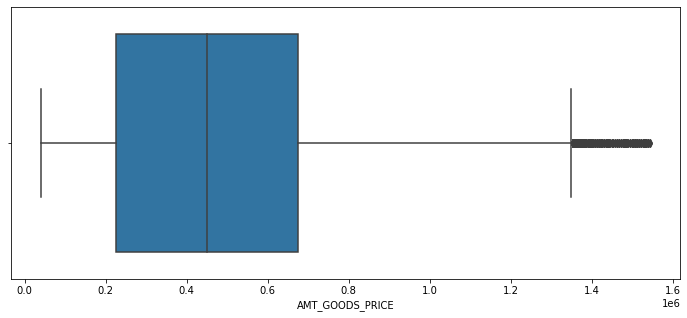

In [36]:
# Identification of Outliers 
plt.figure(figsize=[12,5])
sns.boxplot(data = inp0, x='AMT_GOODS_PRICE')
plt.show()

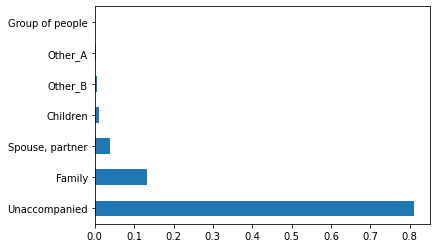

In [38]:
# For NAME_TYPE_SUITE column a categorical variable, Unaccompanied more than 80% , family around 15%, rest all remaining 15%.
inp0.NAME_TYPE_SUITE.value_counts(normalize=True).plot.barh()
plt.show()

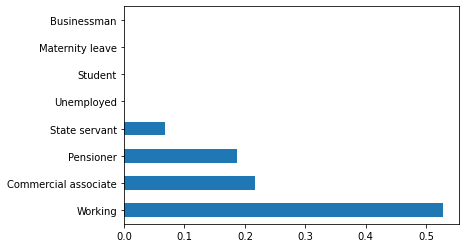

In [39]:
# For NAME_INCOME_TYPE column a categorical variable, Working  more than 50% , commercial associate 20% +, Pensioner 18%, remaining 22%
inp0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

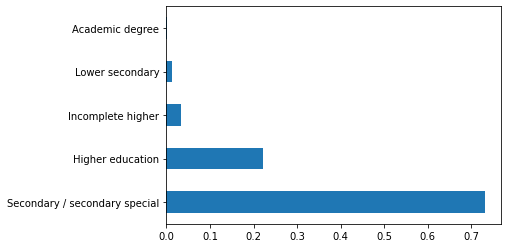

In [40]:
# For NAME_EDUCATION_TYPE column a categorical variable, Secondary/secondary special more than 70% , Higher education 23% +, remaining 7%
inp0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

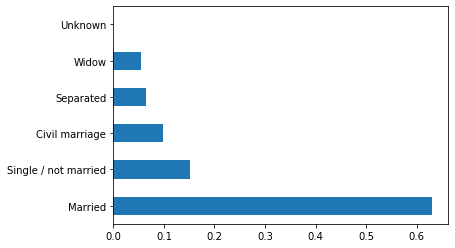

In [41]:
# For NAME_FAMILY_STATUS column a categorical variable, Married more than 60% , Single / Not married 15% +, civil marriage 10%, remaining 15%
inp0.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.show()

### Categorical unordered univariate analysis

In [42]:
inp0.CODE_GENDER.value_counts(normalize=True)

F     0.67
M     0.33
XNA   0.00
Name: CODE_GENDER, dtype: float64

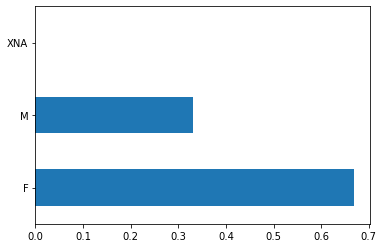

In [43]:
inp0.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()

In [44]:
inp0.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment     0.89
With parents          0.05
Municipal apartment   0.04
Rented apartment      0.02
Office apartment      0.01
Co-op apartment       0.00
Name: NAME_HOUSING_TYPE, dtype: float64

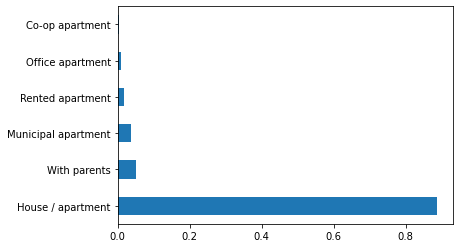

In [45]:
inp0.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

### Categorical ordered univariate analysis

In [46]:
inp0.PARENT_CAT.value_counts(normalize=True)

NONE     0.70
ONE      0.20
TWO      0.09
OTHERS   0.01
Name: PARENT_CAT, dtype: float64

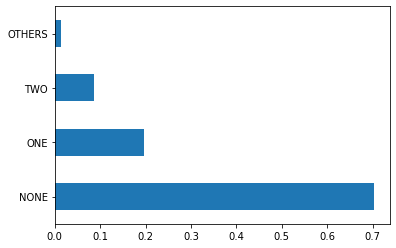

In [47]:
inp0.PARENT_CAT.value_counts(normalize=True).plot.barh()
plt.show()

In [48]:
inp0.CNT_FAM_MEMBERS.describe()

count   281,226.00
mean          2.14
std           0.91
min           1.00
25%           2.00
50%           2.00
75%           3.00
max          20.00
Name: CNT_FAM_MEMBERS, dtype: float64

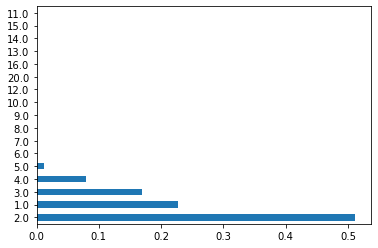

In [49]:
inp0.CNT_FAM_MEMBERS.value_counts(normalize=True).plot.barh()
plt.show()

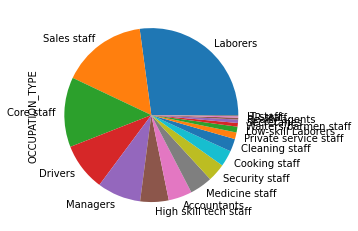

In [50]:
inp0[~(inp0.OCCUPATION_TYPE == 'OTHERS')].OCCUPATION_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

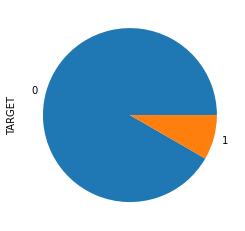

In [51]:
#plot the pie chart of target categories
inp0.TARGET.value_counts(normalize=True).plot.pie()
plt.show()

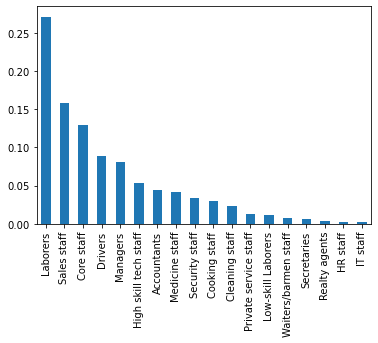

In [52]:
#calculate the percentage of each response category.
inp0[~(inp0.OCCUPATION_TYPE == 'OTHERS')].OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

### Bivariate and Multivariate Analysis

In [53]:
#groupby the education to find the mean of the salary education category.
inp0.groupby("NAME_EDUCATION_TYPE")["AMT_INCOME_TOTAL"].mean()

NAME_EDUCATION_TYPE
Academic degree                 181,507.32
Higher education                171,861.69
Incomplete higher               161,770.78
Lower secondary                 124,236.91
Secondary / secondary special   144,238.71
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
# Converting AGE from DAYS to year and adding a new column AGE_CLIENT
#inp0.DAYS_BIRTH = abs(inp0.DAYS_BIRTH)/365
inp0["AGE_CLIENT"] = inp0.DAYS_BIRTH/365
inp0.AGE_CLIENT.describe()

count   281,227.00
mean        -43.95
std          12.10
min         -69.04
25%         -54.13
50%         -43.14
75%         -33.80
max         -20.52
Name: AGE_CLIENT, dtype: float64

In [55]:
#groupby the education to find the mean of the salary education category.
inp0.groupby("NAME_INCOME_TYPE")["AMT_INCOME_TOTAL"].mean()

NAME_INCOME_TYPE
Businessman            195,000.00
Commercial associate   170,490.55
Maternity leave         85,500.00
Pensioner              127,693.35
State servant          158,778.71
Student                142,593.75
Unemployed             100,215.00
Working                149,648.81
Name: AMT_INCOME_TOTAL, dtype: float64

In [56]:
#create heat map of NAME_EDUCATION_TYPE vs NAME_INCOME_TYPE vs TARGET
res = pd.pivot_table(data = inp0, index="NAME_EDUCATION_TYPE", columns="NAME_HOUSING_TYPE", values="TARGET")
res

NAME_HOUSING_TYPE,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
NAME_EDUCATION_TYPE,,,,,,
Academic degree,0.00,0.01,NaN,0.00,0.00,0.00
Higher education,0.09,0.05,0.06,0.05,0.07,0.07
Incomplete higher,0.06,0.08,0.09,0.03,0.12,0.11
Lower secondary,0.00,0.11,0.13,0.12,0.12,0.15
Secondary / secondary special,0.08,0.09,0.09,0.08,0.14,0.14


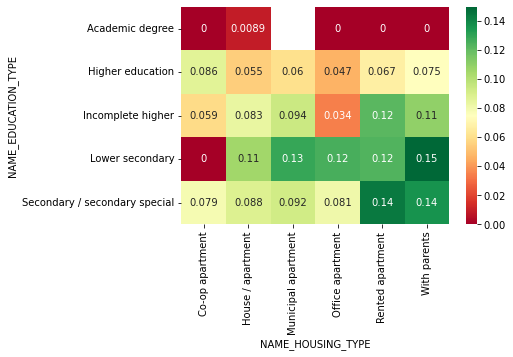

In [57]:
sns.heatmap(res, annot=True, cmap="RdYlGn")
plt.show()
# It is seen correlation b/n target value with lower secondary, Secondary / secondary speciale education type  and rented apartment, with parents.
# housingtypes than other education types. ie more number of defaulters with these categories.


In [58]:
#create heat map of NAME_EDUCATION_TYPE vs NAME_CONTRACT_TYPE vs TARGET
res = pd.pivot_table(data = inp0, index="NAME_EDUCATION_TYPE", columns="NAME_CONTRACT_TYPE", values="TARGET")
res

NAME_CONTRACT_TYPE,Cash loans,Revolving loans
NAME_EDUCATION_TYPE,,
Academic degree,0.01,0.00
Higher education,0.06,0.04
Incomplete higher,0.09,0.06
Lower secondary,0.11,0.10
Secondary / secondary special,0.09,0.07


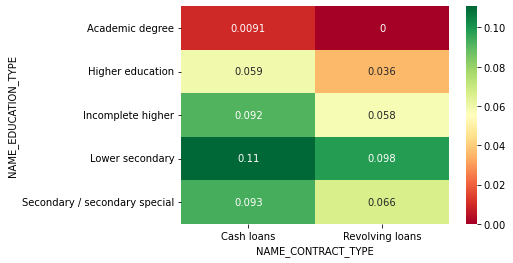

In [59]:
sns.heatmap(res, annot=True, cmap="RdYlGn")
plt.show()
# It is seen Target value is found more  
# lower secondary, Secondary / secondary speciale education type  and rented apartment, with parents. housing types than other education types.

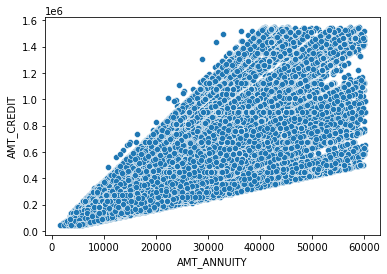

In [60]:
# Bivariate analysis between AMT_ANNUITY and AMT_CREDIT
sns.scatterplot(x=inp0.AMT_ANNUITY, y=inp0['AMT_CREDIT'])
plt.show()
#We can see some relationship b/n these AMT_CREDIT and AMT_ANNUITY

In [63]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281227 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   281227 non-null  int64  
 1   TARGET                       281227 non-null  int64  
 2   NAME_CONTRACT_TYPE           281227 non-null  object 
 3   CODE_GENDER                  281227 non-null  object 
 4   FLAG_OWN_CAR                 281227 non-null  object 
 5   FLAG_OWN_REALTY              281227 non-null  object 
 6   AMT_INCOME_TOTAL             281227 non-null  float64
 7   AMT_CREDIT                   281227 non-null  float64
 8   AMT_ANNUITY                  281215 non-null  float64
 9   AMT_GOODS_PRICE              280957 non-null  float64
 10  NAME_TYPE_SUITE              280094 non-null  object 
 11  NAME_INCOME_TYPE             281227 non-null  object 
 12  NAME_EDUCATION_TYPE          281227 non-null  object 
 13 

### Segmented Univariate Analysis

In [64]:
# Create Data frame for Defaulters and non defaulters
inp01 = inp0[inp0["TARGET"]==1]
inp01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23419 entries, 0 to 307509
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   23419 non-null  int64  
 1   TARGET                       23419 non-null  int64  
 2   NAME_CONTRACT_TYPE           23419 non-null  object 
 3   CODE_GENDER                  23419 non-null  object 
 4   FLAG_OWN_CAR                 23419 non-null  object 
 5   FLAG_OWN_REALTY              23419 non-null  object 
 6   AMT_INCOME_TOTAL             23419 non-null  float64
 7   AMT_CREDIT                   23419 non-null  float64
 8   AMT_ANNUITY                  23419 non-null  float64
 9   AMT_GOODS_PRICE              23398 non-null  float64
 10  NAME_TYPE_SUITE              23353 non-null  object 
 11  NAME_INCOME_TYPE             23419 non-null  object 
 12  NAME_EDUCATION_TYPE          23419 non-null  object 
 13  NAME_FAMILY_STA

In [65]:
# Create Data frame for non defaulters
inp02 = inp0[inp0["TARGET"]==0]
inp02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257808 entries, 1 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   257808 non-null  int64  
 1   TARGET                       257808 non-null  int64  
 2   NAME_CONTRACT_TYPE           257808 non-null  object 
 3   CODE_GENDER                  257808 non-null  object 
 4   FLAG_OWN_CAR                 257808 non-null  object 
 5   FLAG_OWN_REALTY              257808 non-null  object 
 6   AMT_INCOME_TOTAL             257808 non-null  float64
 7   AMT_CREDIT                   257808 non-null  float64
 8   AMT_ANNUITY                  257796 non-null  float64
 9   AMT_GOODS_PRICE              257559 non-null  float64
 10  NAME_TYPE_SUITE              256741 non-null  object 
 11  NAME_INCOME_TYPE             257808 non-null  object 
 12  NAME_EDUCATION_TYPE          257808 non-null  object 
 13 

### Segmented Univariate Analysis Defaulters 

In [304]:
inp01.AMT_CREDIT.describe()
#675000 + 1.5*(675000 - 279000)

count      23,419.00
mean      526,536.03
std       302,018.85
min        45,000.00
25%       279,000.00
50%       473,760.00
75%       675,000.00
max     1,540,867.50
Name: AMT_CREDIT, dtype: float64

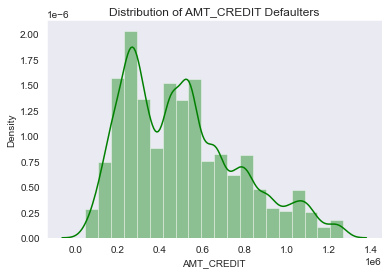

In [303]:
sns.set_style("dark")
sns.distplot(inp01[inp01['AMT_CREDIT'] < 1269000].AMT_CREDIT, bins=20, color="g")
plt.title("Distribution of AMT_CREDIT Defaulters", fontsize=12)
plt.show()

### Segmented Univariate Analysis Non Defaulters 

In [66]:
inp02.AMT_CREDIT.describe()

count     257,808.00
mean      544,089.61
std       334,749.90
min        45,000.00
25%       269,550.00
50%       485,190.00
75%       760,225.50
max     1,545,624.00
Name: AMT_CREDIT, dtype: float64

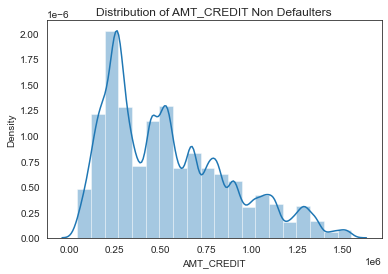

In [67]:
import warnings
warnings.filterwarnings("ignore")
sns.set_style("white")
sns.distplot(inp02.AMT_CREDIT, bins=20 )
plt.title("Distribution of AMT_CREDIT Non Defaulters", fontsize=12)
plt.show()

In [68]:
inp01.AMT_INCOME_TOTAL.describe()

count    23,419.00
mean    148,744.97
std      59,029.57
min      27,000.00
25%     112,500.00
50%     135,000.00
75%     180,000.00
max     336,825.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [69]:
inp02.AMT_INCOME_TOTAL.describe()

count   257,808.00
mean    150,852.29
std      61,552.51
min      25,650.00
25%     112,500.00
50%     135,000.00
75%     180,000.00
max     337,050.00
Name: AMT_INCOME_TOTAL, dtype: float64

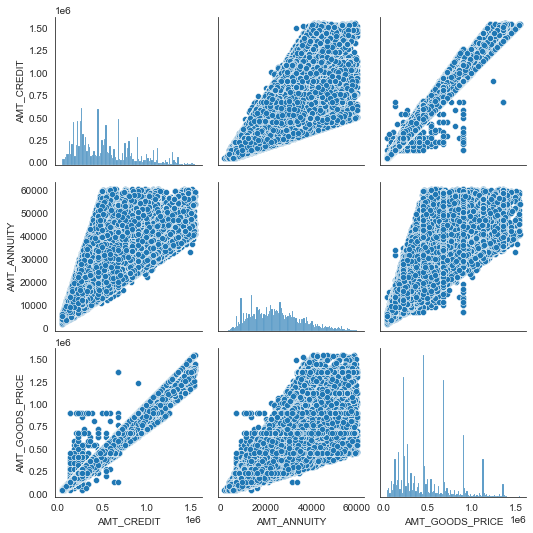

In [300]:
#x=inp0[inp0['OCCUPATION_TYPE'].notnull()][['TARGET', 'NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE']]
x = inp02[['AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE'  ]]
sns.pairplot(x)
plt.show()

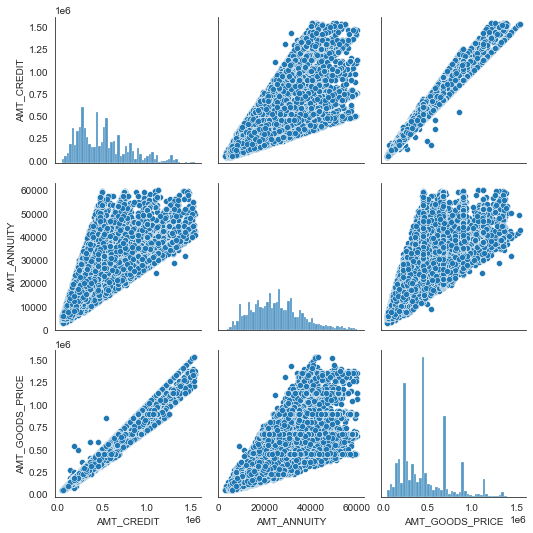

In [299]:
#x=inp0[inp0['OCCUPATION_TYPE'].notnull()][['TARGET', 'NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE']]
x = inp01[ [ 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE' ]]
sns.pairplot(x)
plt.show()

### Analysis of previous application data 

In [121]:
inp1= pd.read_csv("previous_application.csv")
inp1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,"1,670,214.00","1,670,214.00","1,297,979.00","1,670,214.00","1,670,213.00","774,370.00","1,284,699.00","1,670,214.00","1,670,214.00","774,370.00",...,"5,951.00","1,670,214.00","1,670,214.00","1,297,984.00","997,149.00","997,149.00","997,149.00","997,149.00","997,149.00","997,149.00"
mean,"1,923,089.14","278,357.17","15,955.12","175,233.86","196,114.02","6,697.40","227,847.28",12.48,1.00,0.08,...,0.77,-880.68,313.95,16.05,"342,209.86","13,826.27","33,767.77","76,582.40","81,992.34",0.33
std,"532,597.96","102,814.82","14,782.14","292,779.76","318,574.62","20,921.50","315,396.56",3.33,0.06,0.11,...,0.10,779.10,"7,127.44",14.57,"88,916.12","72,444.87","106,857.03","149,647.42","153,303.52",0.47
min,"1,000,001.00","100,001.00",0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,...,0.37,"-2,922.00",-1.00,0.00,"-2,922.00","-2,892.00","-2,801.00","-2,889.00","-2,874.00",0.00
25%,"1,461,857.25","189,329.00","6,321.78","18,720.00","24,160.50",0.00,"50,841.00",10.00,1.00,0.00,...,0.72,"-1,300.00",-1.00,6.00,"365,243.00","-1,628.00","-1,242.00","-1,314.00","-1,270.00",0.00
50%,"1,923,110.50","278,714.50","11,250.00","71,046.00","80,541.00","1,638.00","112,320.00",12.00,1.00,0.05,...,0.84,-581.00,3.00,12.00,"365,243.00",-831.00,-361.00,-537.00,-499.00,0.00
75%,"2,384,279.75","367,514.00","20,658.42","180,360.00","216,418.50","7,740.00","234,000.00",15.00,1.00,0.11,...,0.85,-280.00,82.00,24.00,"365,243.00",-411.00,129.00,-74.00,-44.00,1.00
max,"2,845,382.00","456,255.00","418,058.15","6,905,160.00","6,905,160.00","3,060,045.00","6,905,160.00",23.00,1.00,1.00,...,1.00,-1.00,"4,000,000.00",84.00,"365,243.00","365,243.00","365,243.00","365,243.00","365,243.00",1.00


### RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED have null values for most of rows. 
### Here we replace these 2 column values of  null by 0 so that we dont miss out RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED during analysis

In [122]:

inp1['RATE_INTEREST_PRIMARY'] = inp1['RATE_INTEREST_PRIMARY'].fillna(0)
inp1['RATE_INTEREST_PRIVILEGED'] = inp1['RATE_INTEREST_PRIVILEGED'].fillna(0)
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Missing values cleanup - A threshold value of 40% is considered. ie all columns with null values more than 40% are removed.

In [123]:
inp1.isnull().mean()
inp1 = inp1.loc[:, inp1.isnull().mean() < .4]


In [124]:
inp1.size
inp1.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  RATE_INTEREST_PRIMARY        1670214 non-null  float64
 12  RATE_INTEREST_PRIVILEGED     1670214 non-n

In [74]:
inp1.AMT_ANNUITY.describe()


count   1,297,979.00
mean       15,955.12
std        14,782.14
min             0.00
25%         6,321.78
50%        11,250.00
75%        20,658.42
max       418,058.15
Name: AMT_ANNUITY, dtype: float64

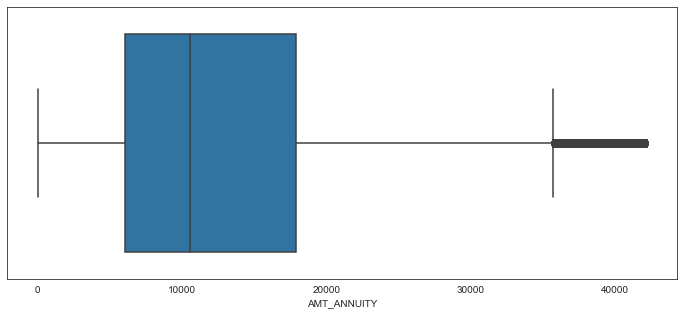

In [75]:
#Create a box plot for AMT_ANNUITY column after cleanup.
plt.figure(figsize=[12,5])
#sns.boxplot(data = inp1, x='AMT_ANNUITY')
sns.boxplot(data = inp1[inp1.AMT_ANNUITY < 42163], x='AMT_ANNUITY')
plt.show()

In [76]:
# Outlier detection using IQR Formula 
20658 + 1.5*(20658-6321)
# Outliers found to be Values above 42163.5

42163.5

In [77]:
inp1.AMT_APPLICATION.describe()

count   1,670,214.00
mean      175,233.86
std       292,779.76
min             0.00
25%        18,720.00
50%        71,046.00
75%       180,360.00
max     6,905,160.00
Name: AMT_APPLICATION, dtype: float64

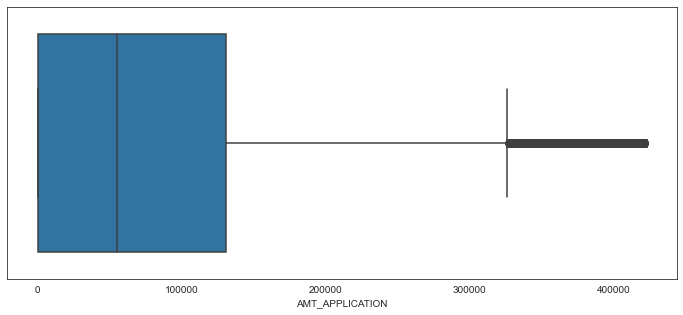

In [78]:
#Create a box plot for AMT_APPLICATION column after cleanup.
plt.figure(figsize=[12,5])
#sns.boxplot(data = inp1, x='AMT_APPLICATION')
sns.boxplot(data = inp1[inp1.AMT_APPLICATION < 422820.0], x='AMT_APPLICATION')
plt.show()

In [79]:
#Outlier detection using IQR Formula
180360 + 1.5*(180360-18720)

422820.0

In [80]:
inp1.AMT_CREDIT.describe()

count   1,670,213.00
mean      196,114.02
std       318,574.62
min             0.00
25%        24,160.50
50%        80,541.00
75%       216,418.50
max     6,905,160.00
Name: AMT_CREDIT, dtype: float64

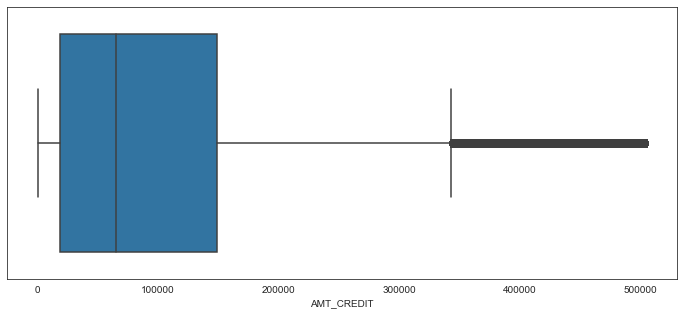

In [82]:
#Create a box plot for AMT_CREDIT column after cleanup.
plt.figure(figsize=[12,5])
#sns.boxplot(data = inp1, x='AMT_CREDIT')
sns.boxplot(data = inp1[inp1.AMT_CREDIT < 504805.0], x='AMT_CREDIT')
plt.show()

In [83]:
#Outlier detection using IQR Formula
216418 + 1.5* (216418-24160)

504805.0

### Univariate Analysis for previous loan data

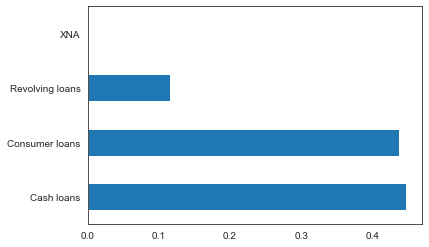

In [86]:
inp1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()


### Contract Type is Cash Loans 45% followed by Consumer Loans 43%, remaining recolving loans

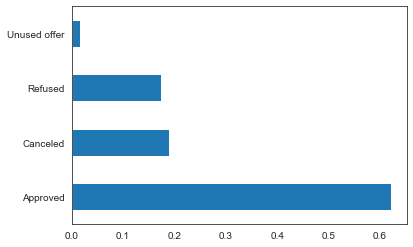

In [87]:
inp1.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.barh()
plt.show()


### More than 60% loans approved, around 18% refused, 20% cancelled. 

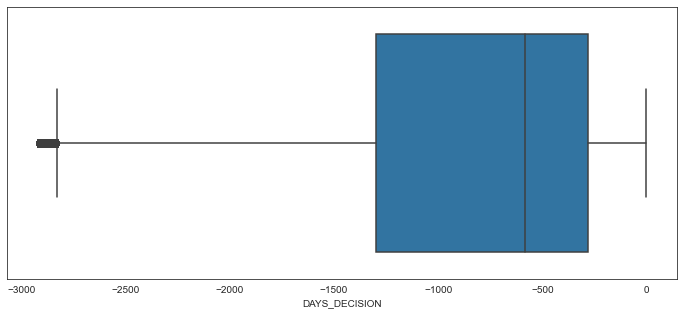

In [88]:
#inp1.DAYS_DECISION = abs(inp1.DAYS_DECISION)
#Create a box plot for DAYS_DECISION column after cleanup.
plt.figure(figsize=[12,5])
sns.boxplot(data = inp1, x='DAYS_DECISION')
#sns.boxplot(data = inp1[inp1.AMT_APPLICATION < 504805.0], x='AMT_APPLICATION')
plt.show()

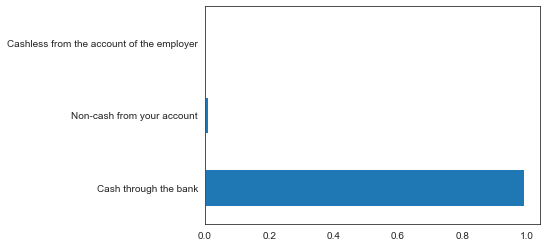

In [89]:
x = inp1[inp1['NAME_PAYMENT_TYPE'] != 'XNA']
x.NAME_PAYMENT_TYPE.value_counts(normalize=True).plot.barh()
plt.show() 


### Cash through back is most preferred NAME_PAYMENT_TYPE, followed by Non - cash from account 

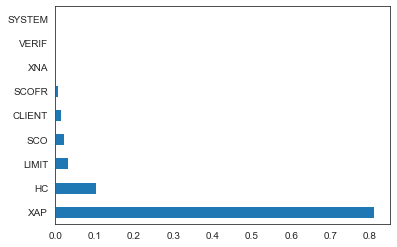

In [90]:
inp1.CODE_REJECT_REASON.value_counts(normalize=True).plot.barh()
plt.show() 

### Reject reason code XAP 80%, HC 10%, LIMIT 5% 

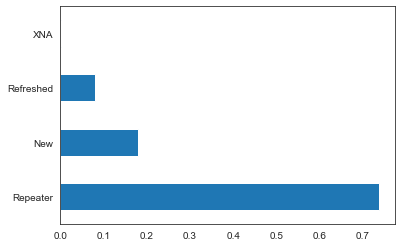

In [91]:
inp1.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.barh()
plt.show() 

### NAME_CLIENT_TYPE is mostly *repeater*, followed by *New* and *Refreshed*

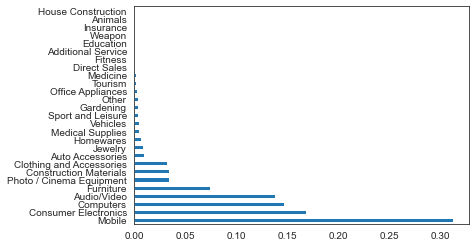

In [92]:
x=inp1[inp1['NAME_GOODS_CATEGORY'] != 'XNA']
x.count()
x.NAME_GOODS_CATEGORY.value_counts(normalize=True).plot.barh()
plt.show()


### NAME_GOODS_CATEGORY is 35% applied for mobile followed 17% for consumer electronics and 15% for computers.

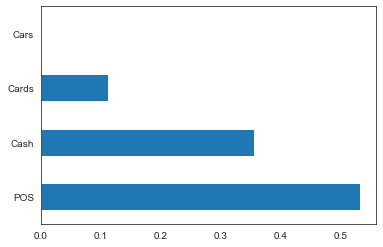

In [94]:
x=inp1[inp1['NAME_PORTFOLIO'] != 'XNA']
x.NAME_PORTFOLIO.value_counts(normalize=True).plot.barh()
plt.show()


### NAME_PORTFOLIO 55% applied thru for POS, 35% thru cash, 10% applied dthru cards.

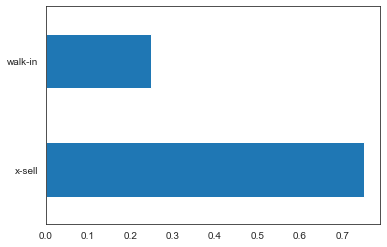

In [95]:
x=inp1[inp1['NAME_PRODUCT_TYPE'] != 'XNA']
x.NAME_PRODUCT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

### NAME_PRODUCT_TYPE 75% x-sell followed by walk-in 25%

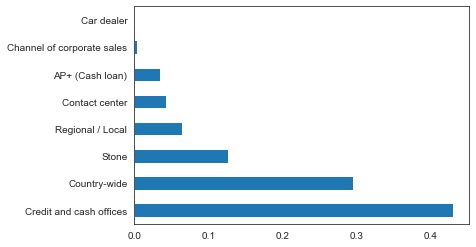

In [96]:
x=inp1[inp1['CHANNEL_TYPE'] != 'XNA']
x.CHANNEL_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

### CHANNEL_TYPE is mostly thru credit and cash offices, followed by country-wide and Stone, 

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object


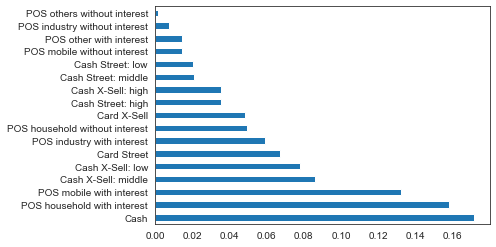

In [97]:
print(inp1.PRODUCT_COMBINATION.describe())

x=inp1[inp1['PRODUCT_COMBINATION'] != 'XNA']
x.PRODUCT_COMBINATION.value_counts(normalize=True).plot.barh()
plt.show()

### PRODUCT_COMBINATION is found mostly Cash, followed by POST household with interest

### Bivariate analysis / multi variate analysis 

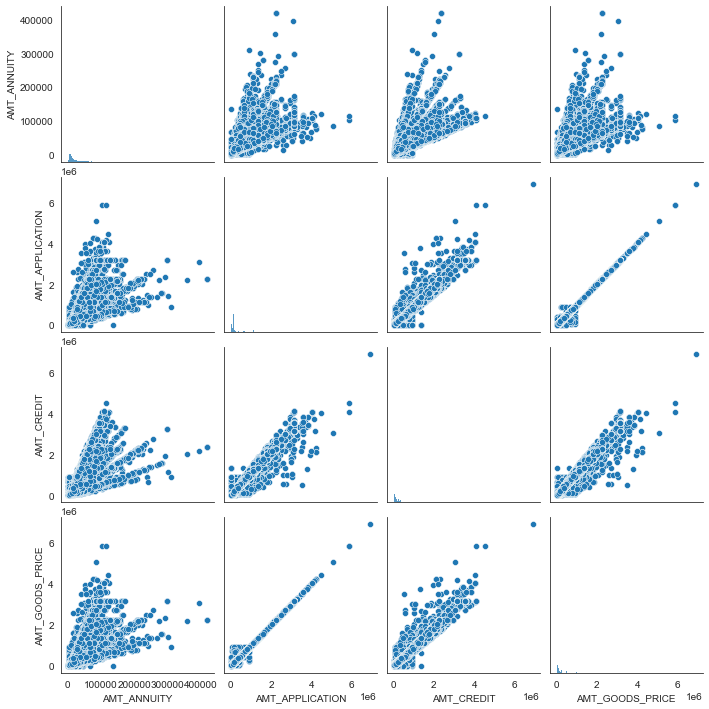

In [222]:
x = inp1[['NAME_CONTRACT_STATUS', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE' ]]
sns.pairplot(x)
plt.show()

### By looking at above pair plots we can make conclusion, clear correction b/n AMT_GOODS_PRICE vs AMT_APPLICATION, AMT_CREDIT vs AMT_APPLICATION, AMT_GOODS_PRICE vs AMT_CREDIT 

In [107]:
inp1.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved       0.62
Canceled       0.19
Refused        0.17
Unused offer   0.02
Name: NAME_CONTRACT_STATUS, dtype: float64

### To make meaningful decision about whether loan is approved or not, so we will create a new field called TARGET based on  categorical variable NAME_CONTRACT_STATUS 

In [127]:

def func1(x):
    if x == "Approved":
        return 1
#     elsif x = "Canceled":
#         return -1
    else:
        return 0
inp1["TARGET"] = inp1.NAME_CONTRACT_STATUS.apply(func1)

In [128]:
#create heat map of NAME_CONTRACT_TYPE  vs CHANNEL_TYPE to see correlation with TARGET 
res = pd.pivot_table(data = inp1[inp1["NAME_CONTRACT_STATUS"] != 'Canceled'], index="NAME_CONTRACT_TYPE", columns="CHANNEL_TYPE", values="TARGET")
res

CHANNEL_TYPE,AP+ (Cash loan),Car dealer,Channel of corporate sales,Contact center,Country-wide,Credit and cash offices,Regional / Local,Stone
NAME_CONTRACT_TYPE,,,,,,,,
Cash loans,0.61,0.81,0.40,0.52,0.72,0.66,0.69,0.67
Consumer loans,0.00,0.69,NaN,NaN,0.83,0.00,0.91,0.90
Revolving loans,0.52,0.50,0.57,0.89,0.73,0.63,0.72,0.73
XNA,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN


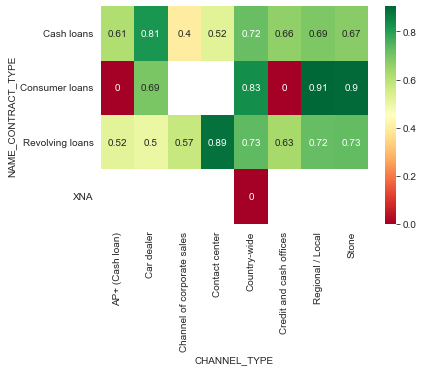

In [129]:
pd.options.display.float_format = '{:,.2f}'.format
sns.heatmap(res, annot=True, cmap="RdYlGn")
plt.show()

### It is seen there is correlation b/n contract types Consumer loans and Regional / Local and channel types consumer loans and Stone. 

In [104]:
inp1.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean()



NAME_CONTRACT_TYPE
Cash loans        304,061.49
Consumer loans     91,524.59
Revolving loans   173,505.60
XNA                     0.00
Name: AMT_CREDIT, dtype: float64

In [105]:
inp1.groupby("NAME_CLIENT_TYPE")["AMT_CREDIT"].mean()


NAME_CLIENT_TYPE
New         106,273.49
Refreshed   192,611.36
Repeater    218,560.05
XNA         151,214.44
Name: AMT_CREDIT, dtype: float64

In [106]:
inp1.groupby("NAME_GOODS_CATEGORY")["AMT_CREDIT"].mean()



NAME_GOODS_CATEGORY
Additional Service           175,637.57
Animals                       81,000.00
Audio/Video                  104,094.37
Auto Accessories              89,865.76
Clothing and Accessories     192,788.20
Computers                    105,815.21
Construction Materials       146,420.02
Consumer Electronics          90,297.44
Direct Sales                 216,627.73
Education                    219,170.90
Fitness                      120,986.53
Furniture                    144,688.87
Gardening                    134,849.63
Homewares                    155,512.08
House Construction         2,700,000.00
Insurance                     92,311.33
Jewelry                       82,327.16
Medical Supplies             178,084.71
Medicine                     176,161.65
Mobile                        46,337.53
Office Appliances             62,997.31
Other                         61,875.54
Photo / Cinema Equipment      61,235.29
Sport and Leisure            103,705.66
Tourism             

### Segmented univariated analysis

In [181]:
#Split previous_application data into 2 data sets based on derived column NAME_CONTRACT_STATUS - Approved or Not Approved
inp10 = inp1[inp1["NAME_CONTRACT_STATUS"]=='Approved']
inp10.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,TARGET
count,"1,036,781.00","1,036,781.00","1,036,773.00","1,036,781.00","1,036,780.00","993,946.00","1,036,781.00","1,036,781.00","1,036,781.00","1,036,781.00","1,036,781.00","1,036,781.00","1,036,777.00","1,036,781.00"
mean,"1,903,648.43","278,241.80","14,720.35","180,567.00","202,564.18","188,348.70",12.62,1.00,0.00,0.00,"-1,100.76",438.42,14.12,1.00
std,"535,566.93","102,797.07","13,802.35","253,618.79","275,302.67","256,181.29",3.33,0.03,0.02,0.06,791.54,"9,013.63",11.96,0.00
min,"1,000,001.00","100,001.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-2,922.00",-1.00,0.00,1.00
25%,"1,435,012.00","189,259.00","5,940.36","45,000.00","47,970.00","47,025.00",10.00,1.00,0.00,0.00,"-1,642.00",-1.00,6.00,1.00
50%,"1,896,641.00","278,447.00","10,380.24","90,000.00","102,208.50","96,709.50",12.00,1.00,0.00,0.00,-862.00,34.00,12.00,1.00
75%,"2,368,895.00","367,299.00","18,337.99","196,339.50","225,000.00","206,899.88",15.00,1.00,0.00,0.00,-460.00,154.00,18.00,1.00
max,"2,843,499.00","456,255.00","393,868.66","5,850,000.00","4,509,688.50","5,850,000.00",23.00,1.00,1.00,1.00,-1.00,"4,000,000.00",84.00,1.00


In [182]:
inp11 = inp1[inp1["NAME_CONTRACT_STATUS"] != 'Approved']
inp11.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,TARGET
count,"633,433.00","633,433.00","261,206.00","633,433.00","633,433.00","290,753.00","633,433.00","633,433.00","633,433.00","633,433.00","633,433.00","633,433.00","261,207.00","633,433.00"
mean,"1,954,909.00","278,546.01","20,856.14","166,504.76","185,556.63","362,874.11",12.26,0.99,0.00,0.00,-520.46,110.23,23.72,0.00
std,"526,155.07","102,843.68","17,309.07","347,304.01","378,645.40","437,737.05",3.33,0.09,0.00,0.00,604.97,949.82,20.32,0.00
min,"1,009,238.00","100,005.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"-2,922.00",-1.00,0.00,0.00
25%,"1,512,756.00","189,411.00","8,756.55",0.00,0.00,"73,431.00",10.00,1.00,0.00,0.00,-524.00,-1.00,6.00,0.00
50%,"1,966,290.00","279,176.00","16,013.83",0.00,0.00,"183,676.50",12.00,1.00,0.00,0.00,-304.00,-1.00,18.00,0.00
75%,"2,405,859.00","367,845.00","28,465.38","157,500.00","180,000.00","450,000.00",15.00,1.00,0.00,0.00,-183.00,0.00,36.00,0.00
max,"2,845,382.00","456,255.00","418,058.15","6,905,160.00","6,905,160.00","6,905,160.00",23.00,1.00,0.00,0.00,-2.00,"74,625.00",84.00,0.00


In [291]:
inp10.AMT_CREDIT.describe()
225000 + 1.5*(225000 - 47970)

490545.0

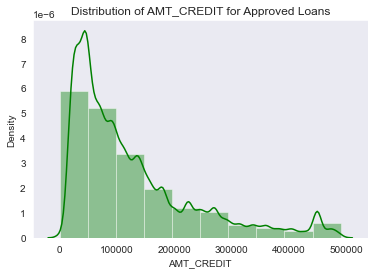

In [190]:
sns.set_style("dark")
sns.distplot(inp10[inp10['AMT_CREDIT'] < 490545.0].AMT_CREDIT, bins=10, color="g")
plt.title("Distribution of AMT_CREDIT for Approved Loans", fontsize=12)
plt.show()


In [293]:
inp11.AMT_CREDIT.describe()
180000 + 1.5*(180000)

450000.0

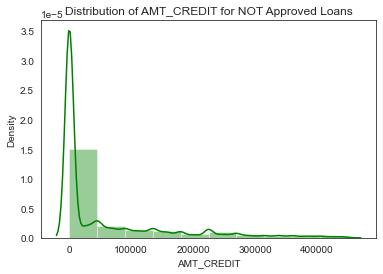

In [289]:
sns.set_style("white")
sns.distplot(inp11[inp11['AMT_CREDIT'] < 450000.0].AMT_CREDIT, bins=10, color="g")
plt.title("Distribution of AMT_CREDIT for NOT Approved Loans", fontsize=12)
plt.show()

### Merge 2 data sets

### Merge application data ie inp0 with previous application data ie inp1 with inner join using column SK_ID_CURR


In [ ]:
inp0 = pd.merge(left=inp0,right=inp1, how='inner', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [195]:
inp0.describe()

,SK_ID_CURR,TARGET_x,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,TARGET_y
count,"1,297,168.00","1,297,168.00","1,297,168.00","1,297,168.00","1,297,075.00","1,295,979.00","1,297,168.00","1,297,168.00","1,297,168.00","1,297,168.00",...,"1,297,167.00","1,004,222.00","1,297,168.00","1,297,168.00","1,297,168.00","1,297,168.00","1,297,168.00","1,297,168.00","1,015,194.00","1,297,168.00"
mean,"278,443.54",0.09,"156,580.43","539,823.17","25,066.48","482,917.44",0.02,"-16,320.36","71,034.77","-5,036.00",...,"186,659.25","214,427.01",12.42,1.00,0.00,0.00,-877.14,309.22,16.00,0.63
std,"102,802.64",0.28,"61,570.64","329,564.02","11,466.55","299,530.29",0.01,"4,392.42","147,029.52","3,558.61",...,"300,461.21","295,302.68",3.31,0.06,0.01,0.05,783.28,"7,205.05",14.50,0.48
min,"100,002.00",0.00,"25,650.00","45,000.00","1,615.50","40,500.00",0.00,"-25,201.00","-17,912.00","-24,672.00",...,0.00,0.00,0.00,0.00,0.00,0.00,"-2,922.00",-1.00,0.00,0.00
25%,"189,297.00",0.00,"112,500.00","270,000.00","16,213.50","225,000.00",0.01,"-20,037.00","-2,774.00","-7,554.00",...,"24,480.00","48,420.00",10.00,1.00,0.00,0.00,"-1,308.00",-1.00,6.00,0.00
50%,"279,019.00",0.00,"148,500.00","477,000.00","23,863.50","450,000.00",0.02,"-16,035.00","-1,238.00","-4,537.00",...,"77,823.00","105,480.00",12.00,1.00,0.00,0.00,-576.00,4.00,12.00,1.00
75%,"367,364.00",0.00,"202,500.00","755,190.00","32,143.50","675,000.00",0.03,"-12,667.00",-257.00,"-2,039.00",...,"202,500.00","225,000.00",15.00,1.00,0.00,0.00,-269.00,83.00,24.00,1.00
max,"456,255.00",1.00,"337,050.00","1,545,624.00","60,160.50","1,543,500.00",0.07,"-7,489.00","365,243.00",0.00,...,"4,104,351.00","4,455,000.00",23.00,1.00,1.00,1.00,-1.00,"4,000,000.00",84.00,1.00


In [197]:
inp0.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297168 entries, 0 to 1297167
Data columns (total 102 columns):
 #    Column                        Non-Null Count    Dtype  
---   ------                        --------------    -----  
 0    SK_ID_CURR                    1297168 non-null  int64  
 1    TARGET_x                      1297168 non-null  int64  
 2    NAME_CONTRACT_TYPE_x          1297168 non-null  object 
 3    CODE_GENDER                   1297168 non-null  object 
 4    FLAG_OWN_CAR                  1297168 non-null  object 
 5    FLAG_OWN_REALTY               1297168 non-null  object 
 6    AMT_INCOME_TOTAL              1297168 non-null  float64
 7    AMT_CREDIT_x                  1297168 non-null  float64
 8    AMT_ANNUITY_x                 1297075 non-null  float64
 9    AMT_GOODS_PRICE_x             1295979 non-null  float64
 10   NAME_TYPE_SUITE               1293829 non-null  object 
 11   NAME_INCOME_TYPE              1297168 non-null  object 
 12   NAME_EDUCATI

### Univariate Analysis 

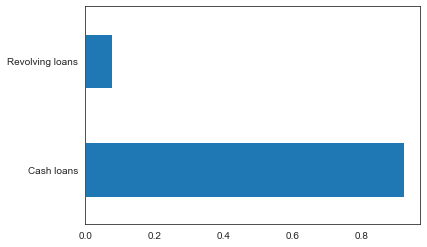

In [211]:
#x=inp1[inp1['NAME_CONTRACT_TYPE_x'] != 'XNA']
inp0.NAME_CONTRACT_TYPE_x.value_counts(normalize=True).plot.barh()
plt.show()

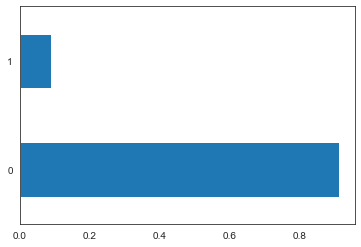

In [213]:
inp0.TARGET_x.value_counts(normalize=True).plot.barh()
plt.show()

In [275]:
inp0.AMT_CREDIT_x.describe()

count   1,297,168.00
mean      539,823.17
std       329,564.02
min        45,000.00
25%       270,000.00
50%       477,000.00
75%       755,190.00
max     1,545,624.00
Name: AMT_CREDIT_x, dtype: float64

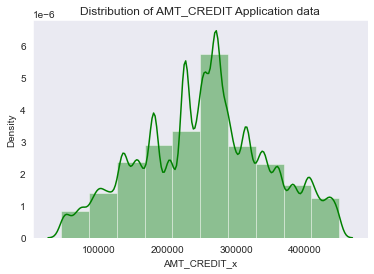

In [283]:
sns.set_style("dark")
sns.distplot(inp0[inp0['AMT_CREDIT_x'] < 450000.0].AMT_CREDIT_x, bins=10, color="g")
#sns.distplot(inp0.AMT_CREDIT_x, bins=20, color="g")
plt.title("Distribution of AMT_CREDIT Application data", fontsize=12)
plt.show()

In [288]:
inp0.AMT_CREDIT_y.describe()
#202500 + 1.5*(202500 - 24480)

count   1,297,167.00
mean      186,659.25
std       300,461.21
min             0.00
25%        24,480.00
50%        77,823.00
75%       202,500.00
max     4,104,351.00
Name: AMT_CREDIT_y, dtype: float64

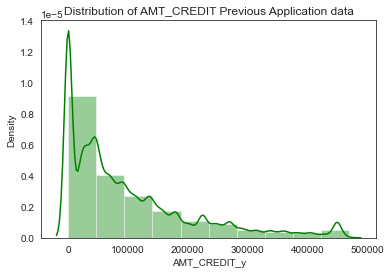

In [285]:
sns.set_style("white")
sns.distplot(inp0[inp0['AMT_CREDIT_y'] < 469530.0].AMT_CREDIT_y, bins=10, color="g")
#sns.distplot(inp0.AMT_CREDIT_y, bins=20, color="g")
plt.title("Distribution of AMT_CREDIT Previous Application data", fontsize=12)
plt.show()

### Bivariate Analysis

### from below heatmap, it is clear that there is correlation b/n CONTRACT_TYPE Cash Loans and Reject reason SCOFR to defaulters, followed by Cash loans vs SCOFR 

In [227]:
#create heat map of NAME_CONTRACT_STATUS  vs TARGET to see correlation with TARGET 
res = pd.pivot_table(data = inp0[inp0["NAME_CONTRACT_TYPE_y"] != 'XNA'], index="NAME_CONTRACT_TYPE_y", columns="CODE_REJECT_REASON", values="TARGET_x")
res

CODE_REJECT_REASON,CLIENT,HC,LIMIT,SCO,SCOFR,SYSTEM,VERIF,XAP,XNA
NAME_CONTRACT_TYPE_y,,,,,,,,,
Cash loans,0.08,0.12,0.14,0.13,0.25,0.16,0.10,0.08,0.13
Consumer loans,0.08,0.10,0.12,0.08,0.13,0.12,0.07,0.08,0.09
Revolving loans,0.00,0.13,0.12,0.11,0.18,0.06,0.09,0.10,0.08


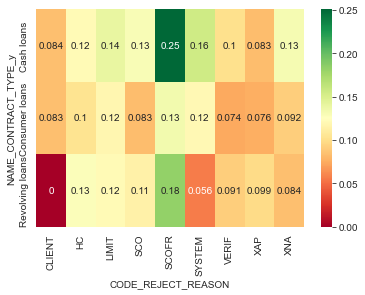

In [228]:
pd.options.display.float_format = '{:,.2f}'.format
sns.heatmap(res, annot=True, cmap="RdYlGn")
plt.show()

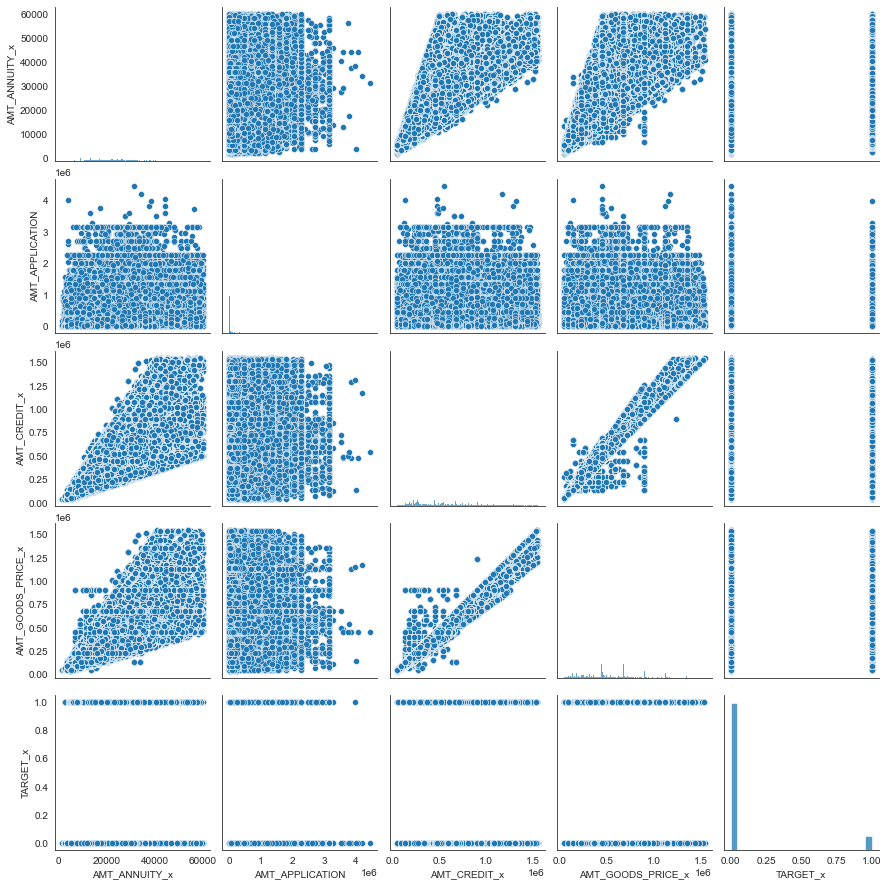

In [231]:
x = inp0[['NAME_CONTRACT_STATUS', 'AMT_ANNUITY_x', 'AMT_APPLICATION', 'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x', 'TARGET_x']]
sns.pairplot(x)
plt.show()

In [233]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET_x', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       ...
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'TARGET_y'],
      dtype='object', length=102)

#corrM = df.corr()

In [263]:
#inp0[inp0['TARGET_x']==1]
corrm = inp0[['AMT_INCOME_TOTAL','AMT_CREDIT_x', 'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','AGE_CLIENT','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','CNT_PAYMENT','TARGET_x']]
corrm.corr()


,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,AGE_CLIENT,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,CNT_PAYMENT,TARGET_x
AMT_INCOME_TOTAL,1.00,0.32,0.40,0.32,0.12,-0.16,0.07,0.21,0.13,0.13,0.17,0.00,0.00,0.05,-0.00
AMT_CREDIT_x,0.32,1.00,0.76,0.98,0.05,-0.06,-0.04,0.12,0.10,0.10,0.11,-0.00,-0.01,0.04,-0.01
AMT_ANNUITY_x,0.40,0.76,1.00,0.76,0.06,-0.12,0.04,0.16,0.09,0.09,0.11,0.00,0.00,-0.00,0.01
AMT_GOODS_PRICE_x,0.32,0.98,0.76,1.00,0.05,-0.06,-0.04,0.12,0.10,0.10,0.11,-0.00,-0.00,0.04,-0.02
REGION_POPULATION_RELATIVE,0.12,0.05,0.06,0.05,1.00,0.01,-0.04,0.06,0.03,0.03,0.04,0.00,0.00,-0.00,-0.03
DAYS_EMPLOYED,-0.16,-0.06,-0.12,-0.06,0.01,1.00,-0.64,0.00,0.02,0.01,0.03,-0.02,-0.02,0.07,-0.05
AGE_CLIENT,0.07,-0.04,0.04,-0.04,-0.04,-0.64,1.00,-0.09,-0.08,-0.08,-0.11,0.03,0.03,-0.13,0.08
AMT_ANNUITY_y,0.21,0.12,0.16,0.12,0.06,0.00,-0.09,1.00,0.81,0.82,0.83,-0.04,-0.05,0.42,-0.01
AMT_APPLICATION,0.13,0.10,0.09,0.10,0.03,0.02,-0.08,0.81,1.00,0.97,1.00,-0.02,-0.02,0.69,-0.00
AMT_CREDIT_y,0.13,0.10,0.09,0.10,0.03,0.01,-0.08,0.82,0.97,1.00,0.99,-0.02,-0.03,0.68,-0.00


In [ ]:
Conclusion based on correlation with Target ie Defaulters : Below are the important factors that influence defauters. 
1.00	AGE_CLIENT
2.00	DAYS_EMPLOYED
3.00	REGION_POPULATION_RELATIVE
3.00	CNT_PAYMENT
4.00	AMT_GOODS_PRICE_x
5.00	AMT_CREDIT_x
5.00	AMT_ANNUITY_x
5.00	AMT_ANNUITY_y

